In [73]:
import csv
import pandas as pd
from datetime import datetime

In [74]:
data = []

with open('crude-oil-price.csv') as file:
    file = csv.reader(file, delimiter=',')
    
    for row in file:
        data.append(row)

In [75]:
df = pd.DataFrame(data[1:], columns=['date', 'price', 'pctChange', 'valueChange'])
df.head()

,date,price,pctChange,valueChange
0,1983-03-30T00:00:00,29.27,,
1,1983-04-04T00:00:00,30.63,4.646395626921763,1.36
2,1983-05-02T00:00:00,30.25,-1.2406137773424748,-0.38
3,1983-06-01T00:00:00,31.38,3.7355371900826446,1.13
4,1983-07-01T00:00:00,32.0,1.975780752071383,0.62


In [76]:
# df['valueChange'].fill
df['valueChange'][0] = 0.0

In [77]:
df['valueChange'][0]

0.0

In [78]:
for n in range(len(df['date'])):
    # df['date'][date] = datetime.strptime(df['date'][date][:10], '%Y-%m-%d')
    df['date'][n] = pd.Timestamp(df['date'][n])

    if df['valueChange'][n] == '':
        df['valueChange'][n] = 0.0
    else:
        df['valueChange'][n] = float(df['valueChange'][n])

    
    if df['pctChange'][n] == '':
        df['pctChange'][n] = 0.0
    else:
        df['pctChange'][n] = float(df['pctChange'][n])

Adicionar colunas que não existem no csv original

In [79]:
year = []
month = []
day = []

for n in range(len(df['date'])):
    year.append(df['date'][n].year)
    month.append(df['date'][n].month)
    day.append(df['date'][n].day)

In [80]:
df['year'] = year
df['month'] = month
df['day'] = day

In [81]:
df.head()

,date,price,pctChange,valueChange,year,month,day
0,1983-03-30 00:00:00,29.27,0.0,0.0,1983,3,30
1,1983-04-04 00:00:00,30.63,4.646396,1.36,1983,4,4
2,1983-05-02 00:00:00,30.25,-1.240614,-0.38,1983,5,2
3,1983-06-01 00:00:00,31.38,3.735537,1.13,1983,6,1
4,1983-07-01 00:00:00,32.0,1.975781,0.62,1983,7,1


Plotando os gráficos

In [82]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

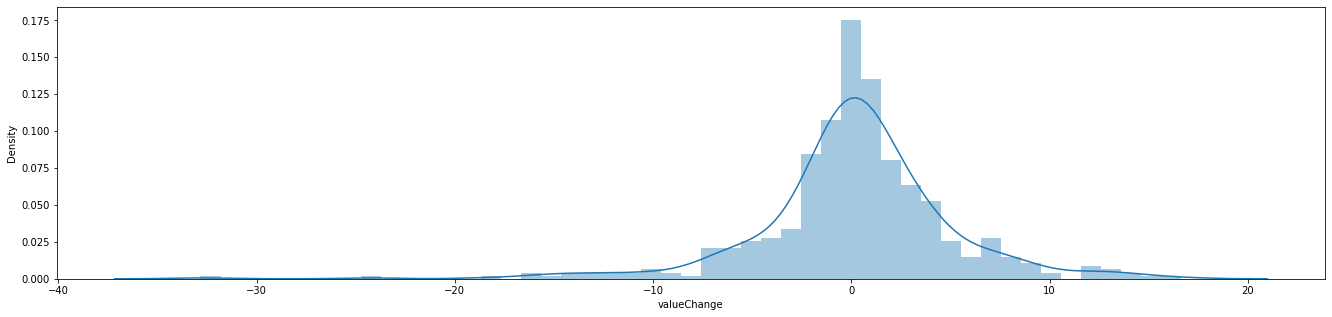

In [83]:
warnings.filterwarnings('ignore')
plt.figure(figsize=(50,5))
plt.subplot(1, 2, 1)
sns.distplot(df['valueChange'])
# plt.subplot(1 ,2, 2)
# sns.distplot(df['date'])
plt.show()

In [84]:
df['valueChange'].describe()

count     469.00
unique    381.00
top        -1.49
freq        4.00
Name: valueChange, dtype: float64

<h3>Lineplot Seborn</h3>

In [117]:
df_anual = df[['year', 'price']][:50]

In [118]:
df_anual.head()

,year,price
0,1983,29.27
1,1983,30.63
2,1983,30.25
3,1983,31.38
4,1983,32.0


<AxesSubplot:xlabel='year', ylabel='price'>

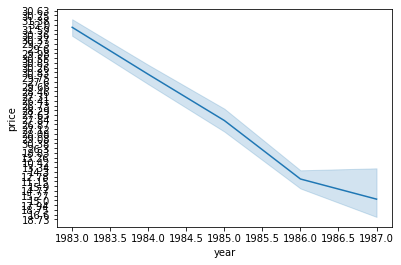

In [119]:
# sns.lineplot(data=df_anual, x='year', y='price')